In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import copy

In [2]:
oecd_bli = pd.read_csv("./oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

df = pd.read_csv(
    "./gdp_per_capita.csv",
    thousands=",",
    delimiter="\t",
    encoding="latin1",
    na_values="n/a",
)
df.rename(columns={'2015': 'GDP per capita'}, inplace=True)
df.set_index("Country", inplace=True)

df = pd.merge(left=oecd_bli, right=df, left_index=True, right_index=True)
df.sort_values(by="GDP per capita", inplace=True)

print(df.shape)
df.head()

(36, 30)


,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [3]:
print(df.shape)
df.isnull().sum()

(36, 30)


Air pollution                                0
Assault rate                                 0
Consultation on rule-making                  0
Dwellings without basic facilities           0
Educational attainment                       0
Employees working very long hours            0
Employment rate                              0
Homicide rate                                0
Household net adjusted disposable income     0
Household net financial wealth               0
Housing expenditure                          0
Job security                                 0
Life expectancy                              0
Life satisfaction                            0
Long-term unemployment rate                  0
Personal earnings                            0
Quality of support network                   0
Rooms per person                             0
Self-reported health                         0
Student skills                               0
Time devoted to leisure and personal care    0
Voter turnout

In [4]:
df = df.dropna(axis='columns')

In [5]:
print(df.shape)
df.isnull().sum()

(36, 30)


Air pollution                                0
Assault rate                                 0
Consultation on rule-making                  0
Dwellings without basic facilities           0
Educational attainment                       0
Employees working very long hours            0
Employment rate                              0
Homicide rate                                0
Household net adjusted disposable income     0
Household net financial wealth               0
Housing expenditure                          0
Job security                                 0
Life expectancy                              0
Life satisfaction                            0
Long-term unemployment rate                  0
Personal earnings                            0
Quality of support network                   0
Rooms per person                             0
Self-reported health                         0
Student skills                               0
Time devoted to leisure and personal care    0
Voter turnout

In [6]:
target_column = 'Life satisfaction'

X = df.drop(columns=[target_column])
y = df[target_column]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([x_train, y_train], axis=1)

In [7]:

train_data.corr(numeric_only=True)[target_column].sort_values(ascending=False)

Life satisfaction                            1.000000
Employment rate                              0.779417
GDP per capita                               0.693938
Personal earnings                            0.661883
Self-reported health                         0.657744
Rooms per person                             0.604219
Household net adjusted disposable income     0.594691
Water quality                                0.560549
Quality of support network                   0.522654
Household net financial wealth               0.482994
Life expectancy                              0.431754
Voter turnout                                0.270763
Educational attainment                       0.221012
Estimates Start After                        0.214318
Years in education                           0.181400
Consultation on rule-making                  0.154740
Student skills                               0.082784
Time devoted to leisure and personal care    0.078176
Homicide rate               

In [8]:
train_data.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita,Estimates Start After,Life satisfaction
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,20.464286,4.285714,6.842857,2.953571,74.428571,9.577857,66.285714,3.510714,23315.285714,38243.464286,...,1.603571,68.321429,490.571429,14.771786,70.178571,81.785714,17.525000,32315.013714,2014.464286,6.560714
std,8.770667,2.431082,2.773209,4.023034,17.845901,8.815786,7.971510,6.419838,7500.022957,34841.998587,...,0.467841,14.264833,32.654679,0.499608,11.844841,11.252513,1.295183,19945.235322,0.576204,0.842984
min,9.000000,1.300000,2.000000,0.000000,34.000000,0.160000,49.000000,0.300000,11664.000000,3251.000000,...,0.900000,35.000000,402.000000,13.420000,49.000000,56.000000,14.400000,8669.998000,2013.000000,4.800000
25%,15.000000,2.625000,4.875000,0.375000,70.250000,3.640000,61.000000,0.775000,17764.750000,10453.250000,...,1.200000,59.750000,479.250000,14.447500,61.750000,72.750000,16.475000,15329.028250,2014.000000,5.950000
50%,18.000000,3.750000,6.700000,0.950000,82.000000,7.215000,67.000000,1.150000,22959.500000,28690.500000,...,1.550000,68.500000,494.000000,14.905000,68.500000,83.500000,17.500000,32604.958500,2014.500000,6.800000
75%,27.000000,5.200000,9.000000,4.200000,88.250000,12.655000,72.000000,1.775000,28895.500000,53446.500000,...,1.925000,77.750000,513.500000,14.982500,78.250000,91.250000,18.450000,43633.344000,2015.000000,7.300000
max,46.000000,12.800000,10.900000,15.100000,94.000000,40.860000,82.000000,25.500000,41355.000000,145769.000000,...,2.500000,90.000000,542.000000,15.710000,93.000000,97.000000,19.800000,80675.308000,2015.000000,7.500000


In [9]:
features = ['GDP per capita', 'Employment rate']
# filter chosen features
x_train = x_train[features]
x_test = x_test[features]

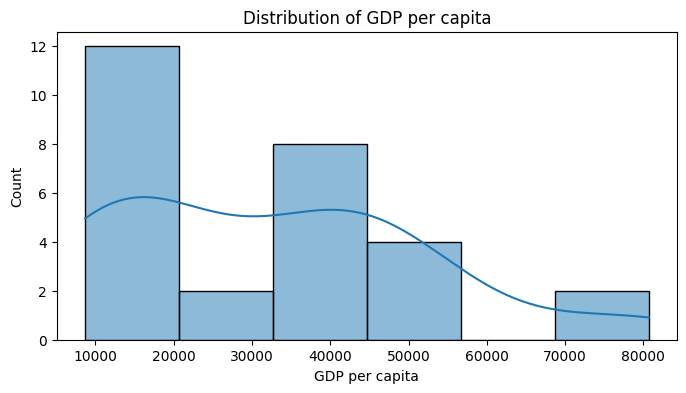

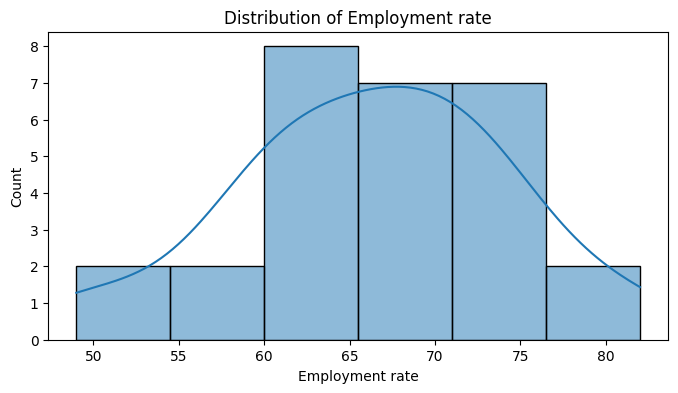

In [10]:
for f in features:
    plt.figure(figsize=(8,4))  # Create a new figure for each plot
    sns.histplot(data=train_data, x=f, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {f}')  # Add a title
plt.show()

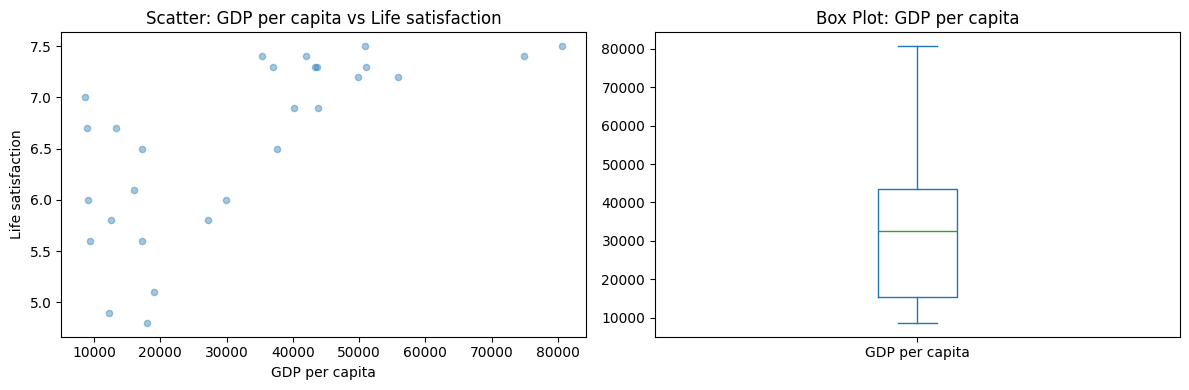

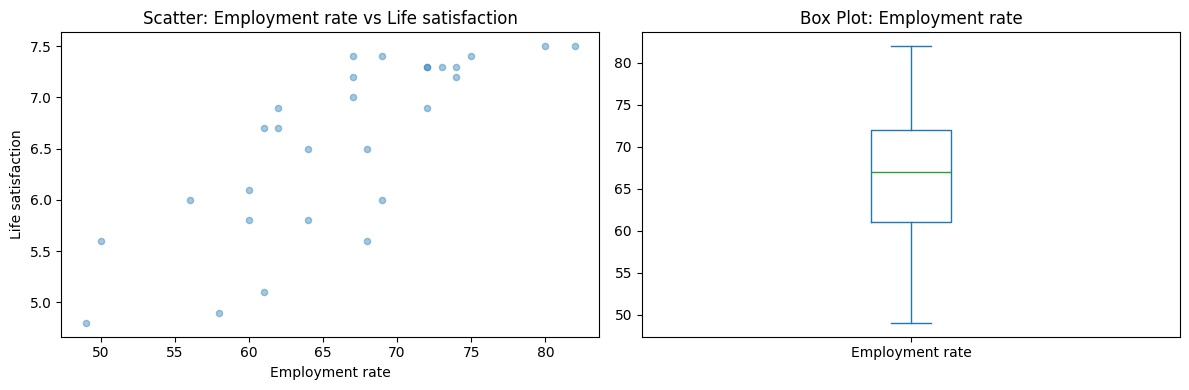

In [11]:
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a side-by-side layout

    # Scatter plot: Feature vs Target
    train_data.plot(kind='scatter', x=feature, y=target_column, alpha=0.4, ax=axes[0])
    axes[0].set_title(f'Scatter: {feature} vs {target_column}')

    # Box plot: Distribution of Feature
    train_data[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title(f'Box Plot: {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [12]:
def remove_outliers(df, columns):
    """
    Remove outliers using the IQR method for specified columns.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

print(train_data.shape)
train_data_clean = remove_outliers(train_data, features)
print(train_data_clean.shape)

(28, 30)
(28, 30)


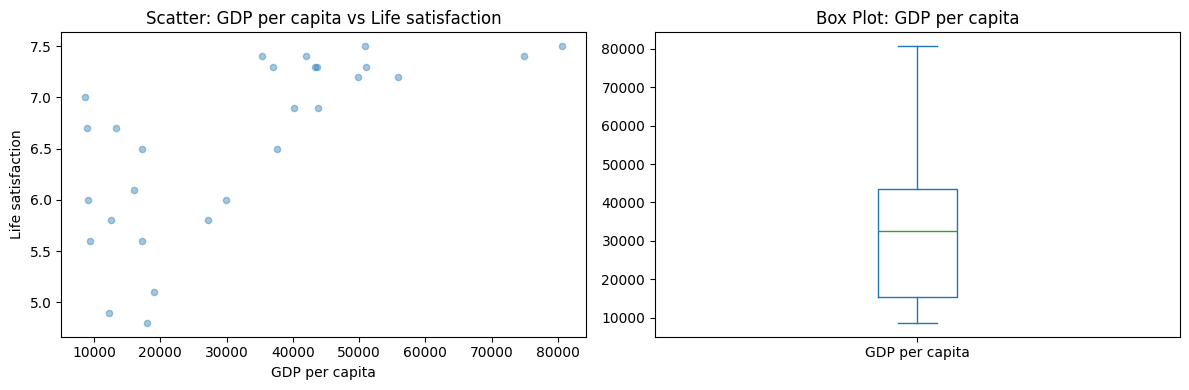

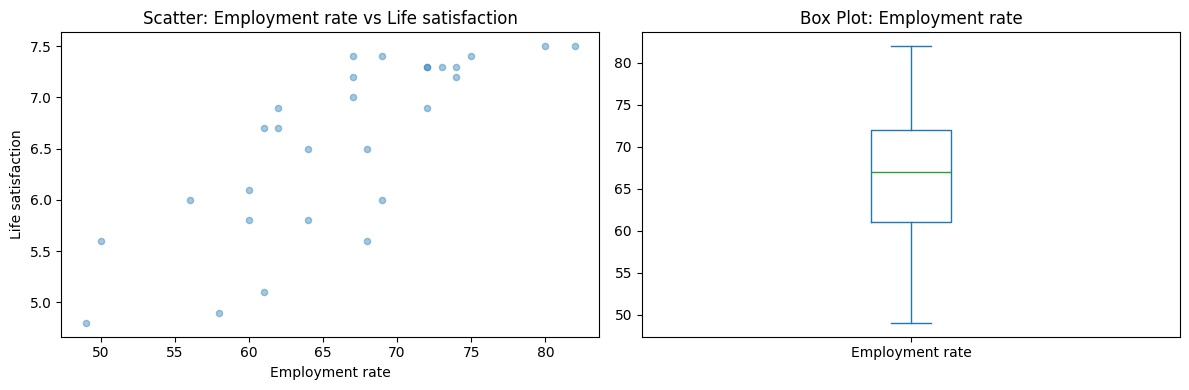

In [13]:
# showing plots after removed outliers
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a side-by-side layout

    # Scatter plot: Feature vs Target
    train_data_clean.plot(kind='scatter', x=feature, y=target_column, alpha=0.4, ax=axes[0])
    axes[0].set_title(f'Scatter: {feature} vs {target_column}')

    # Box plot: Distribution of Feature
    train_data_clean[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title(f'Box Plot: {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [14]:
# setting x_train and y_train
x_train = train_data_clean[features].to_numpy()
y_train = train_data_clean[target_column].to_numpy()
print(x_train.shape)
print(y_train.shape)

(28, 2)
(28,)


In [15]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")
x_train = x_norm.copy()

Peak to Peak range by column in Raw        X:[7.200531e+04 3.300000e+01]
Peak to Peak range by column in Normalized X:[3.67639776 4.21570751]


In [16]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        
        f_wb = np.dot(w, x[i]) + b
        # f_wb = w * x[i] + b

        cost = cost + (f_wb - y[i])**2

    total_cost = cost / (2 * m)
    return total_cost

ini_w = [1, 2]
ini_b = 1

compute_cost(x_train, y_train, ini_w, ini_b)

np.float64(17.838756122122383)

In [17]:
def compute_gradient(x, y, w, b):
    m, n = x.shape

    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        error = (np.dot(w, x[i]) + b) - y[i]
        # error = (w * x[i] + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i, j]
        dj_db = dj_db + error
    
    dj_dw = (1 / m) * dj_dw
    dj_db = (1 / m) * dj_db

    return dj_dw, dj_db

compute_gradient(x_train, y_train, ini_w, ini_b)

(array([1.82575562, 2.05490052]), np.float64(-5.560714285714287))

In [18]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {cost}, dj_dw {dj_dw}, dj_db {dj_db}")
        # print(f"Iteration {i:4}: Cost {cost}, dj_dw {dj_dw}, dj_db {dj_db}")
        
    return w, b, J_history, w_history #return w and J,w history for graphing


initial_w = [0, 0]
initial_b = 0

# some gradient descent settings
iterations = 1000
alpha = 0.01

w, b, _, _ = gradient_descent(
    x_train,
    y_train,
    initial_w,
    initial_b,
    compute_cost,
    compute_gradient,
    alpha,
    iterations,
)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 21.428430263511547, dj_dw [-0.57443778 -0.64519618], dj_db -6.560714285714286
Iteration  100: Cost 2.9548947196209765, dj_dw [-0.08357602 -0.13597657], dj_db -2.401433610424723
Iteration  200: Cost 0.499813446418584, dj_dw [-0.00035862 -0.03916417], dj_db -0.8790023668359854
Iteration  300: Cost 0.17112981574311634, dj_dw [ 0.01081149 -0.01792619], dj_db -0.32174329431768467
Iteration  400: Cost 0.12688117856896258, dj_dw [ 0.01000056 -0.01128131], dj_db -0.11776845130806463
Iteration  500: Cost 0.12082539652907798, dj_dw [ 0.00776493 -0.00799549], dj_db -0.04310706196041208
Iteration  600: Cost 0.11994383064628468, dj_dw [ 0.00581498 -0.00585649], dj_db -0.015778578814780366
Iteration  700: Cost 0.11978719982518111, dj_dw [ 0.00431795 -0.00432543], dj_db -0.005775470145535794
Iteration  800: Cost 0.11974508942697323, dj_dw [ 0.00319978 -0.00320113], dj_db -0.002114008859323795
Iteration  900: Cost 0.11972786200623897, dj_dw [ 0.00236999 -0.00237024], dj_db -0.0007

In [19]:
def plot_target_vs_prediction(x_train, y_train, y_pred, feature_names):
    """
    Plots target vs. predicted values for each feature.

    Parameters:
    - x_train: DataFrame of training features
    - y_train: Series or array of actual target values
    - y_pred: Array of predicted target values
    - feature_names: List of feature names
    """
    num_features = len(feature_names)  # Number of features to plot

    # Create a subplot with one row and multiple columns (one per feature)
    fig, axes = plt.subplots(1, num_features, sharey=True, figsize=(10, 5))

    # Ensure axes is always iterable (even if there's one feature)
    if num_features == 1:
        axes = [axes]

    # Plot each feature
    for i, feature in enumerate(feature_names):
        # axes[i].scatter(x_train.iloc[:, i].values, y_train.values, label='Target', alpha=0.5)
        # axes[i].scatter(x_train.iloc[:, i].values, y_pred, label='Prediction', alpha=0.5)
        axes[i].scatter(x_train[:, i], y_train, label='Target', alpha=0.5)
        axes[i].scatter(x_train[:, i], y_pred, label='Prediction', alpha=0.5)
        axes[i].set_xlabel(feature)

    # Set labels and title
    axes[0].set_ylabel(target_column)
    axes[0].legend()
    fig.suptitle("Target vs Prediction using Z-score Normalized Model")

    # Display the plot
    plt.show()

y_pred [6.47396116 6.64151778 6.47435351 7.99412519 6.30570902 5.80934272
 7.1388779  5.9109659  6.49043604 5.93284977 6.0764178  5.94910704
 7.16652475 6.43084613 7.61970739 5.29289529 6.89912613 7.04281986
 7.24537581 5.34135982 6.8452867  7.02381324 7.0477559  6.06378638
 6.40075829 5.97686835 6.35849861 7.73898297]


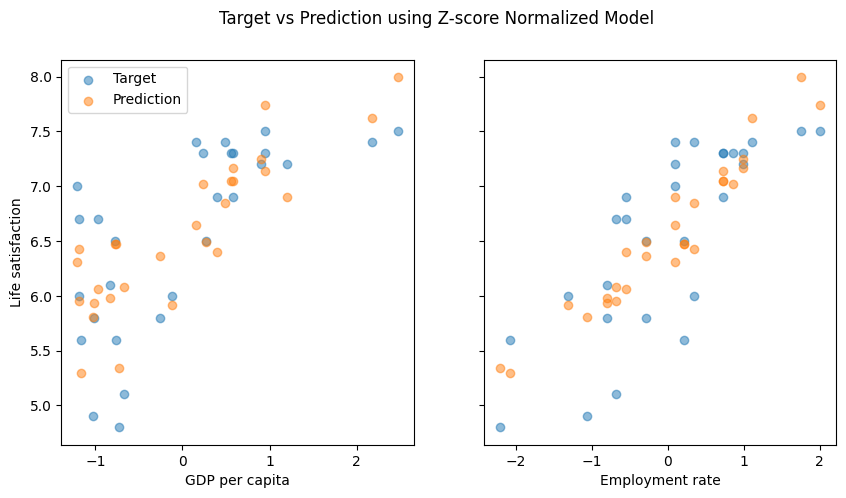

['GDP per capita', 'Employment rate']
(28, 2)
(28,)
(28,)


In [20]:
# y_pred = model.predict(x_norm)
m = x_train.shape[0]
y_pred = np.array([])
for i in range(m):
    y_pred = np.append(y_pred, np.dot(w, x_train[i]) + b)
print('y_pred', y_pred)
plot_target_vs_prediction(x_train, y_train, y_pred, features)
print(features)
print(x_train.shape)
print(y_train.shape)
print(y_pred.shape)